In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [5]:
#load data
data1_ref = pd.read_csv("../data/GR11_2/boucle1_dumont/boucle1_dumont_gps.csv")
data2_ref = pd.read_csv("../data/GR11_2/boucle2_dumont/boucle2_dumont_gps.csv")
data3_ref = pd.read_csv("../data/GR11_2/boucle3_dumont/boucle3_dumont_gps.csv")
data4_ref = pd.read_csv("../data/GR11_2/boucle4_dumont/boucle4_dumont_gps.csv")
data1_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_1.csv")
data2_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_2.csv")
data3_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_3.csv")
data4_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_4.csv")


data1_mes.describe()

,Latitude,Longitude
count,252.000000,252.000000
mean,49.384278,1.069417
std,0.000109,0.000590
min,49.384082,1.068578
25%,49.384185,1.068858
50%,49.384281,1.069312
75%,49.384330,1.069919
max,49.384570,1.070493


In [6]:
def haversine(lat1, lon1, lat2, lon2, earth_radius=6371):
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    km = earth_radius * 2 * np.arcsin(np.sqrt(a))
    m = km * 1000
    return m

In [7]:
test = haversine(data1_ref["Latitude"][0],data1_ref["Longitude"][0],data1_ref["Latitude"][1],data1_ref["Longitude"][1])

In [8]:
test

0.08249353320971949

In [9]:
import datetime
for el in data1_ref["Timestamp"]:
    print(datetime.datetime.utcfromtimestamp(el))

2025-03-25 16:09:37.386847
2025-03-25 16:09:38.336628
2025-03-25 16:09:39.317843
2025-03-25 16:09:40.353239
2025-03-25 16:09:41.342456
2025-03-25 16:09:42.360300
2025-03-25 16:09:43.368370
2025-03-25 16:09:44.377562
2025-03-25 16:09:45.380574
2025-03-25 16:09:46.392132
2025-03-25 16:09:47.380864
2025-03-25 16:09:48.343314
2025-03-25 16:09:49.397575
2025-03-25 16:09:50.381676
2025-03-25 16:09:51.382084
2025-03-25 16:09:52.379548
2025-03-25 16:09:53.376180
2025-03-25 16:09:54.395625
2025-03-25 16:09:55.416600
2025-03-25 16:09:56.399423
2025-03-25 16:09:57.406135
2025-03-25 16:09:58.403673
2025-03-25 16:09:59.409345
2025-03-25 16:10:00.426718
2025-03-25 16:10:01.410975
2025-03-25 16:10:02.428345
2025-03-25 16:10:03.376894
2025-03-25 16:10:04.392151
2025-03-25 16:10:05.406384
2025-03-25 16:10:06.421012
2025-03-25 16:10:07.415398
2025-03-25 16:10:08.356259
2025-03-25 16:10:09.359976
2025-03-25 16:10:10.365802
2025-03-25 16:10:11.401117
2025-03-25 16:10:12.351362
2025-03-25 16:10:13.385983
2

In [10]:
distances = [
    haversine(data1_ref["Latitude"][i], data1_ref["Longitude"][i],
              data1_ref["Latitude"][i+1], data1_ref["Longitude"][i+1])
    for i in range(len(data1_ref["Timestamp"]) - 1)
]

temps = [
    data1_ref["Timestamp"][i+1] - data1_ref["Timestamp"][i]
    for i in range(len(data1_ref["Timestamp"]) - 1)
]

vitesses = np.array([
    d / t if t != 0 else 0
    for d, t in zip(distances, temps)
])


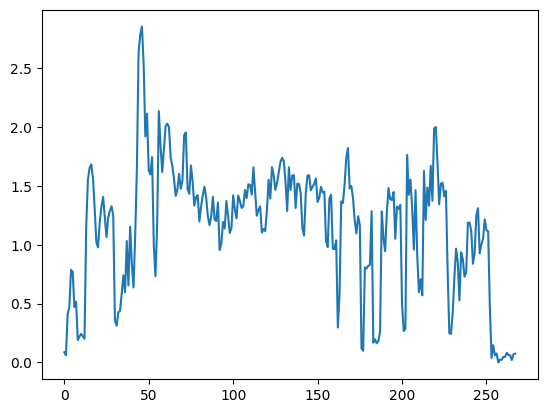

In [11]:
plt.plot(vitesses)

In [12]:
mu = np.mean(vitesses)
sigma = np.std(vitesses)

from scipy.stats import norm

prob_vitesses = norm.pdf(vitesses, mu, sigma)

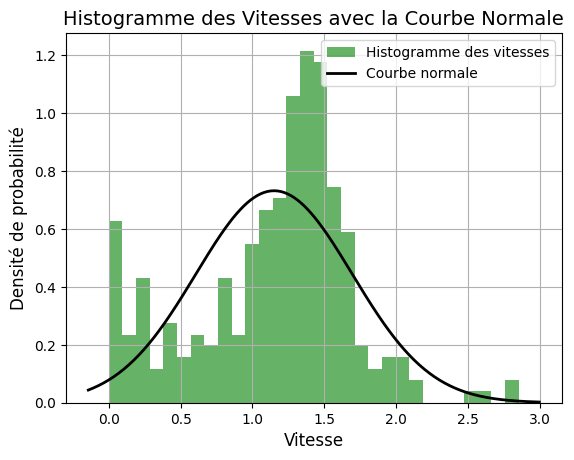

In [13]:
plt.hist(vitesses, bins=30, density=True, alpha=0.6, color='g', label='Histogramme des vitesses')

# Ajouter la courbe normale sur l'histogramme
xmin, xmax = plt.xlim()  # Plage sur l'axe des vitesses
x = np.linspace(xmin, xmax, len(vitesses))  # Créer des valeurs continues pour afficher la courbe
p = norm.pdf(x, mu, sigma)  # Calculer la PDF
plt.plot(x, p, 'k', linewidth=2, label='Courbe normale')

# Ajouter un titre et des labels
plt.title("Histogramme des Vitesses avec la Courbe Normale", fontsize=14)
plt.xlabel("Vitesse", fontsize=12)
plt.ylabel("Densité de probabilité", fontsize=12)

# Afficher la légende et la grille
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


In [14]:
seuil_prob = 0.05
vitesses_filtrees = [v for v, p in zip(vitesses, prob_vitesses) if p > seuil_prob]
indices_enleves = [i for i, (v, p) in enumerate(zip(vitesses, prob_vitesses)) if p <= seuil_prob]

In [15]:
indices_enleves

[44, 45, 46, 47]

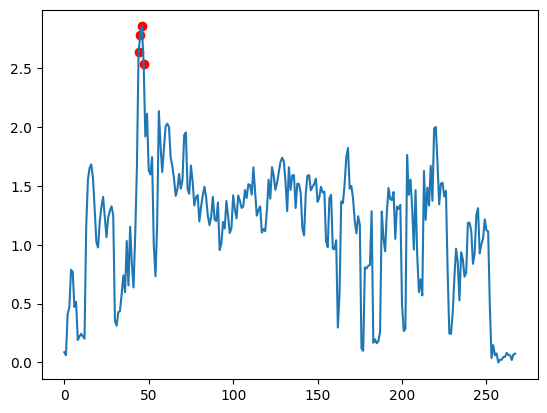

In [16]:
plt.plot(vitesses)
plt.scatter(indices_enleves, vitesses[indices_enleves], color='red', label='Valeurs éliminées')

In [17]:
from scipy.stats import norm
def traitement_point_aberrant(df, seuil_prob = 0.05):
    distances = [
    haversine(df["Latitude"][i], df["Longitude"][i],
              df["Latitude"][i+1], df["Longitude"][i+1])
    for i in range(len(df["Timestamp"]) - 1)
    ]

    temps = [
    df["Timestamp"][i+1] - df["Timestamp"][i]
    for i in range(len(df["Timestamp"]) - 1)
    ]

    vitesses = np.array([
    d / t if t != 0 else 0
    for d, t in zip(distances, temps)
    ])
    
    mu = np.mean(vitesses)
    sigma = np.std(vitesses)

    prob_vitesses = norm.pdf(vitesses, mu, sigma)
    
    vitesses_filtrees = [v for v, p in zip(vitesses, prob_vitesses) if p > seuil_prob]
    indices_enleves = [i for i, (v, p) in enumerate(zip(vitesses, prob_vitesses)) if p <= seuil_prob]
    
    plt.plot(vitesses)
    plt.scatter(indices_enleves, vitesses[indices_enleves], color='red', label='Valeurs éliminées')
    return indices_enleves

def afficher_post_traitement(df, indices_enleves):
    plt.figure(figsize=(10,10))
    plt.plot(data2_ref["Longitude"], data2_ref["Latitude"], marker="o", linestyle="-", alpha=0.3)
    plt.scatter(data2_ref["Longitude"][indices_enleves], data2_ref["Latitude"][indices_enleves],
            color='red', marker="o", s=100, edgecolor='black', label='Points éliminés', alpha=1.0)
    plt.legend()
    plt.show()

Probleme, car les vitesses proche de 0 sont considérées comme improbable et donc aberrante. Pensez à ajuster le modèle!

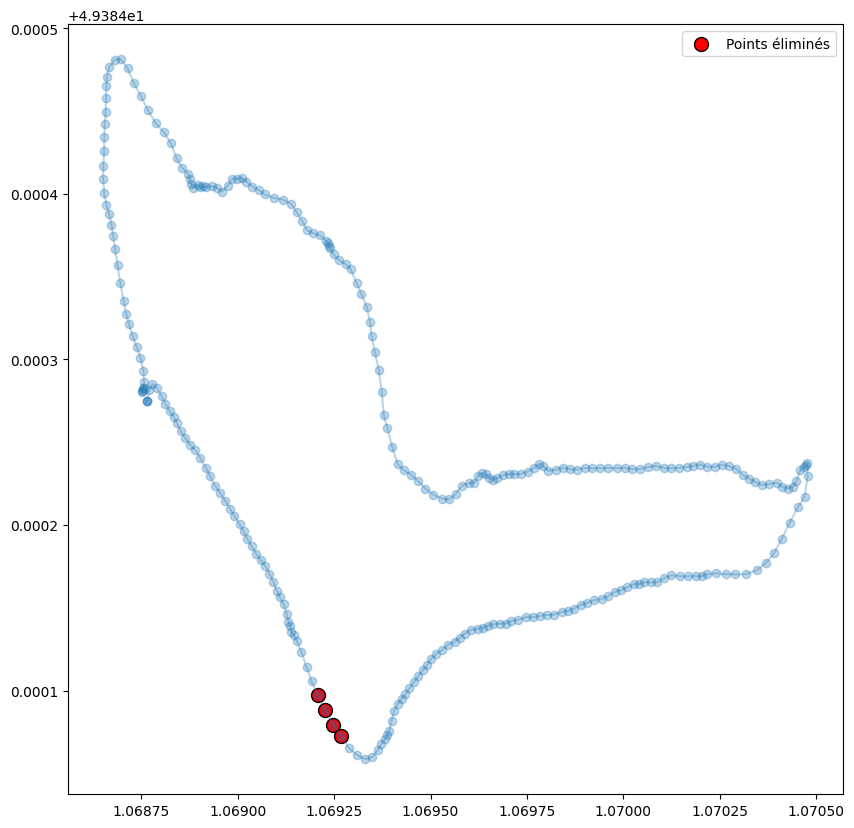

In [18]:
afficher_post_traitement(data2_ref, indices_enleves)

# Code total :

In [19]:
import pandas as pd
#load data
data1_ref = pd.read_csv("../data/GR11_2/boucle1_dumont/boucle1_dumont_gps.csv")
data2_ref = pd.read_csv("../data/GR11_2/boucle2_dumont/boucle2_dumont_gps.csv")
data3_ref = pd.read_csv("../data/GR11_2/boucle3_dumont/boucle3_dumont_gps.csv")
data4_ref = pd.read_csv("../data/GR11_2/boucle4_dumont/boucle4_dumont_gps.csv")
data1_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_1.csv")
data2_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_2.csv")
data3_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_3.csv")
data4_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_4.csv")

In [20]:
from scipy.stats import norm
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kstest

def premier_traitement(vit):
    res = []
    moyenne_vit = np.mean(vit)
    for i in range(len(vit)):
        if vit[i] >= 10 * moyenne_vit:
            res.append(i)
    return res

def traitement_point_aberrant(df, seuil_prob=0.05):
    time_column = 'Timestamp' if 'Timestamp' in df.columns else 'UTC'
    
    if time_column == 'UTC' and df['UTC'].dtype == object:
        df['UTC'] = pd.to_datetime(df['UTC'])

    distances = [
        haversine(df["Latitude"][i], df["Longitude"][i],
                  df["Latitude"][i+1], df["Longitude"][i+1])
        for i in range(len(df[time_column]) - 1)
    ]

    temps = [
        (df[time_column][i+1] - df[time_column][i]).total_seconds()
        if hasattr(df[time_column][i+1] - df[time_column][i], "total_seconds")
        else df[time_column][i+1] - df[time_column][i]
        for i in range(len(df[time_column]) - 1)
    ]

    vitesses = np.array([
        d / t if t != 0 else 0
        for d, t in zip(distances, temps)
    ])
    
    indices_a_ignorer = premier_traitement(vitesses)
    distances_filtrees_v1 = [d for i, d in enumerate(distances) if i not in indices_a_ignorer]
    vitesses_filtrees_v1 = [v for i, v in enumerate(vitesses) if i not in indices_a_ignorer]
    
    mu = np.mean(vitesses_filtrees_v1)
    sigma = np.std(vitesses_filtrees_v1)
    stat, p_value = kstest(vitesses_filtrees_v1, 'norm', args=(mu, sigma))
    print("Kolmogorov-Smirnov test: p =", p_value)
    
    mu = np.mean(vitesses_filtrees_v1)
    sigma = np.std(vitesses_filtrees_v1)
    prob_vitesses = norm.pdf(vitesses, mu, sigma)
    
    indices_enleves = [i+1 for i, (v, p) in enumerate(zip(vitesses, prob_vitesses)) if ((p <= seuil_prob) and (v > 1))]
    vitesses_filtrees_v2 = [v for i, v in enumerate(vitesses_filtrees_v1) if i not in indices_enleves]
    distances_filtrees_v2 = [d for i, d in enumerate(vitesses_filtrees_v1) if i not in indices_enleves]
    
    plt.plot(vitesses)
    indices_affichage = [i-1 for i in indices_enleves]
    plt.scatter(indices_enleves, vitesses[indices_affichage], color='red', label='Valeurs éliminées')
    plt.legend()
    plt.show()
    return indices_enleves, distances_filtrees_v2, vitesses_filtrees_v2

def afficher_post_traitement(df, indices_enleves):
    plt.figure(figsize=(15,15))
    plt.plot(df["Longitude"], df["Latitude"], marker="o", linestyle="-", alpha=0.3)
    plt.scatter(df["Longitude"][indices_enleves], df["Latitude"][indices_enleves],
                color='red', marker="o", s=100, edgecolor='black', label='Points éliminés', alpha=1.0)
    plt.legend()
    plt.show()

def nettoyage_dataset(df, seuil_prob=0.05):
    indices_enleves, _, _ = traitement_point_aberrant(df, seuil_prob)
    df_nettoye = df.drop(index=indices_enleves).reset_index(drop=True)
    afficher_post_traitement(df, indices_enleves)
    return df_nettoye

def afficher_parcours(*df):
    plt.figure(figsize=(15,15))
    for parcour in df:
        plt.plot(parcour["Longitude"], parcour["Latitude"], marker="o", linestyle="-", alpha=0.3)
    plt.show()

### Insertion d'une valeur vraiment aberrante pour vérifier 

Kolmogorov-Smirnov test: p = 8.144337537198754e-13


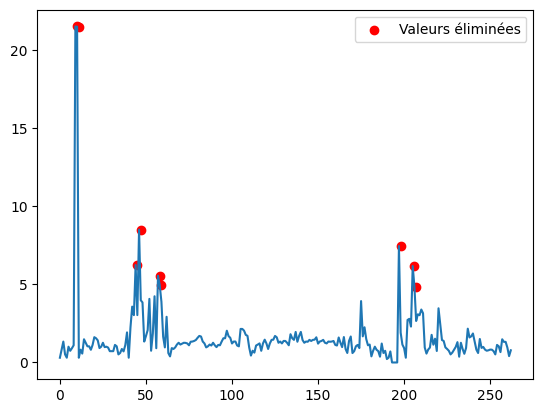

KeyError: 'key of type tuple not found and not a MultiIndex'

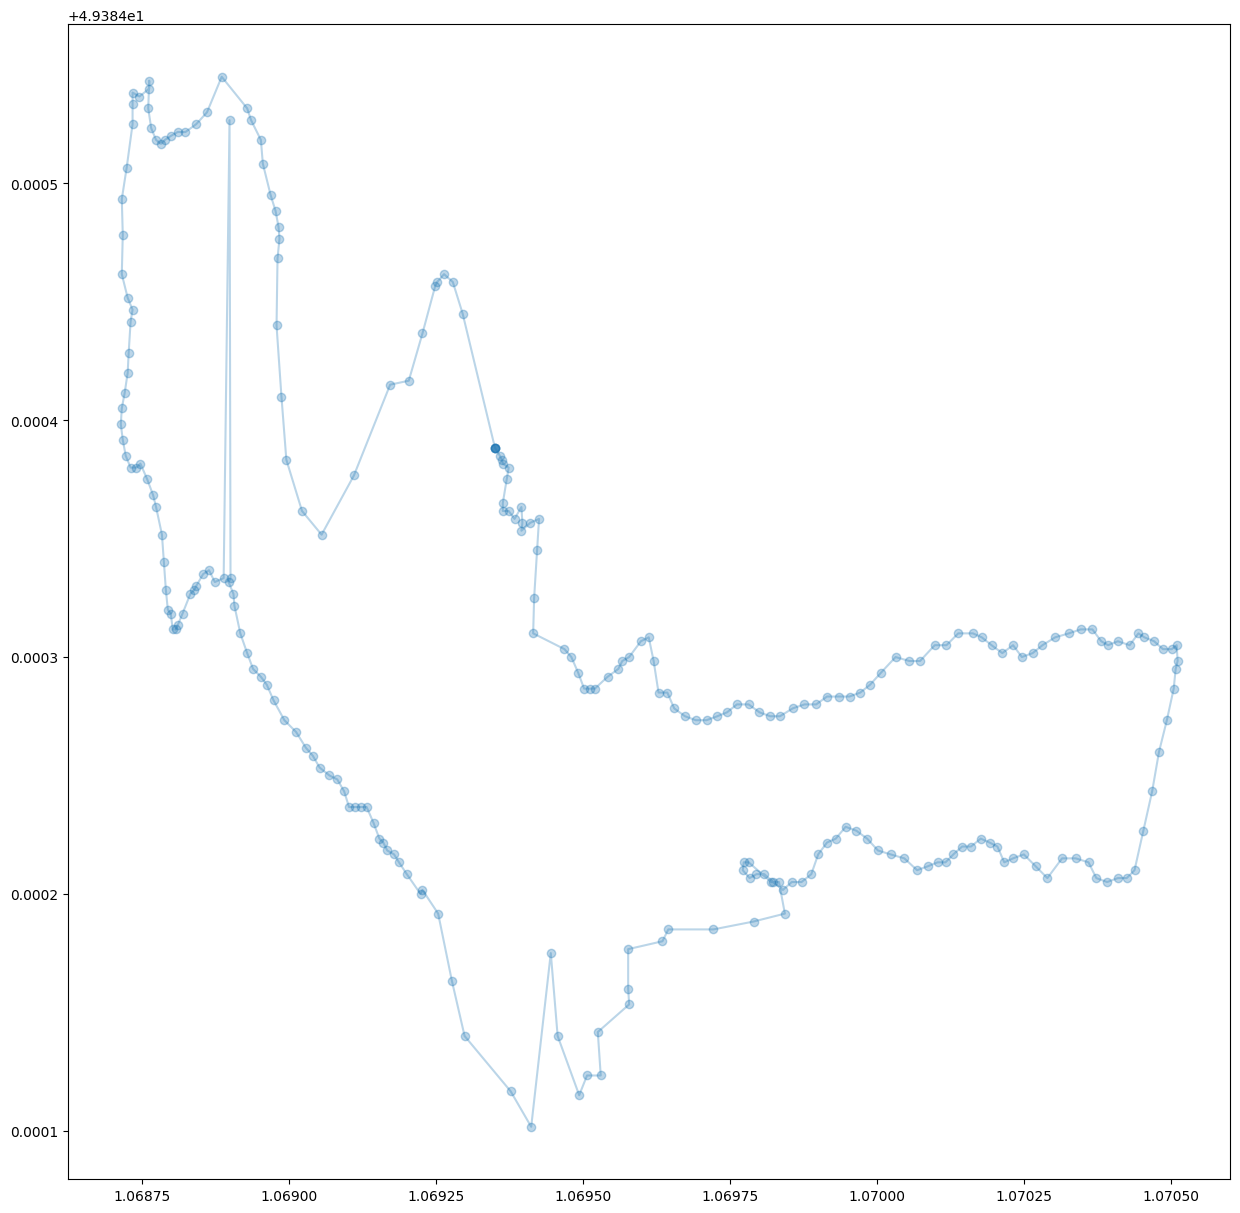

In [21]:
data3_mes.at[10, 'Latitude'] = 49.38452667
ind = traitement_point_aberrant(data3_mes, 0.01)
afficher_post_traitement(data3_mes, ind)

In [ ]:
df = nettoyage_dataset(data3_mes, 0.01)
afficher_parcours(df)

### Ces valeurs d'erreurs statiques ont été calculées, en faisant la moyenne de l'erreur statique moyenne de 4 parcours (entre un parcours de référence et un mesuré au gps) pour la latitude et la longitude

In [ ]:
ERREUR_STATIQUE_LATITUDE =-2.885505986799034e-05
ERREUR_STATIQUE_LONGITUDE =-1.7819133444287528e-05

In [22]:
def enlever_erreur_statique(df, erreur_lat = -2.885505986799034e-05, erreur_long = -1.7819133444287528e-05):
    for i in range(len(df["Latitude"])):
        df.at[i, "Latitude"] += erreur_lat
        df.at[i, "Longitude"] += erreur_long

In [23]:
enlever_erreur_statique(df, ERREUR_STATIQUE_LATITUDE, ERREUR_STATIQUE_LONGITUDE)
df2 = nettoyage_dataset(data3_mes, 0.01);
afficher_parcours(df, df2)

NameError: name 'df' is not defined

In [24]:
def nettoyage_dataset_2(df, seuil_prob=0.05):
    indices_enleves, d, v = traitement_point_aberrant(df, seuil_prob)
    
    if not indices_enleves:
        return df.copy()

    # Création d'une copie pour interpolation
    df_interpole = df.copy()
    # Mise à NaN des points aberrants
    colonnes_a_interpoler = ['Latitude', 'Longitude']
    for col in colonnes_a_interpoler:
        df_interpole.loc[indices_enleves, col] = np.nan
    # Interpolation linéaire sur les colonnes choisies
    df_interpole[colonnes_a_interpoler] = df_interpole[colonnes_a_interpoler].interpolate(method='linear')
    afficher_post_traitement(df, indices_enleves)
    return df_interpole, d, v

Kolmogorov-Smirnov test: p = 8.144337537198754e-13


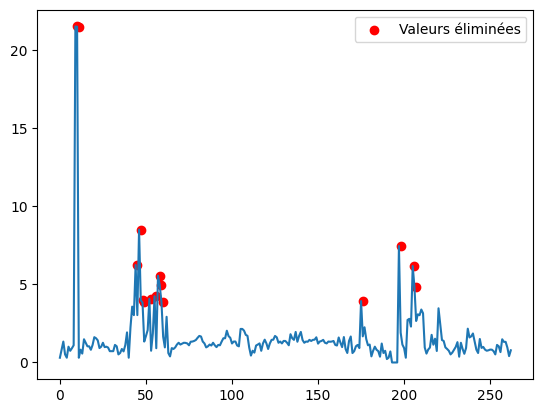

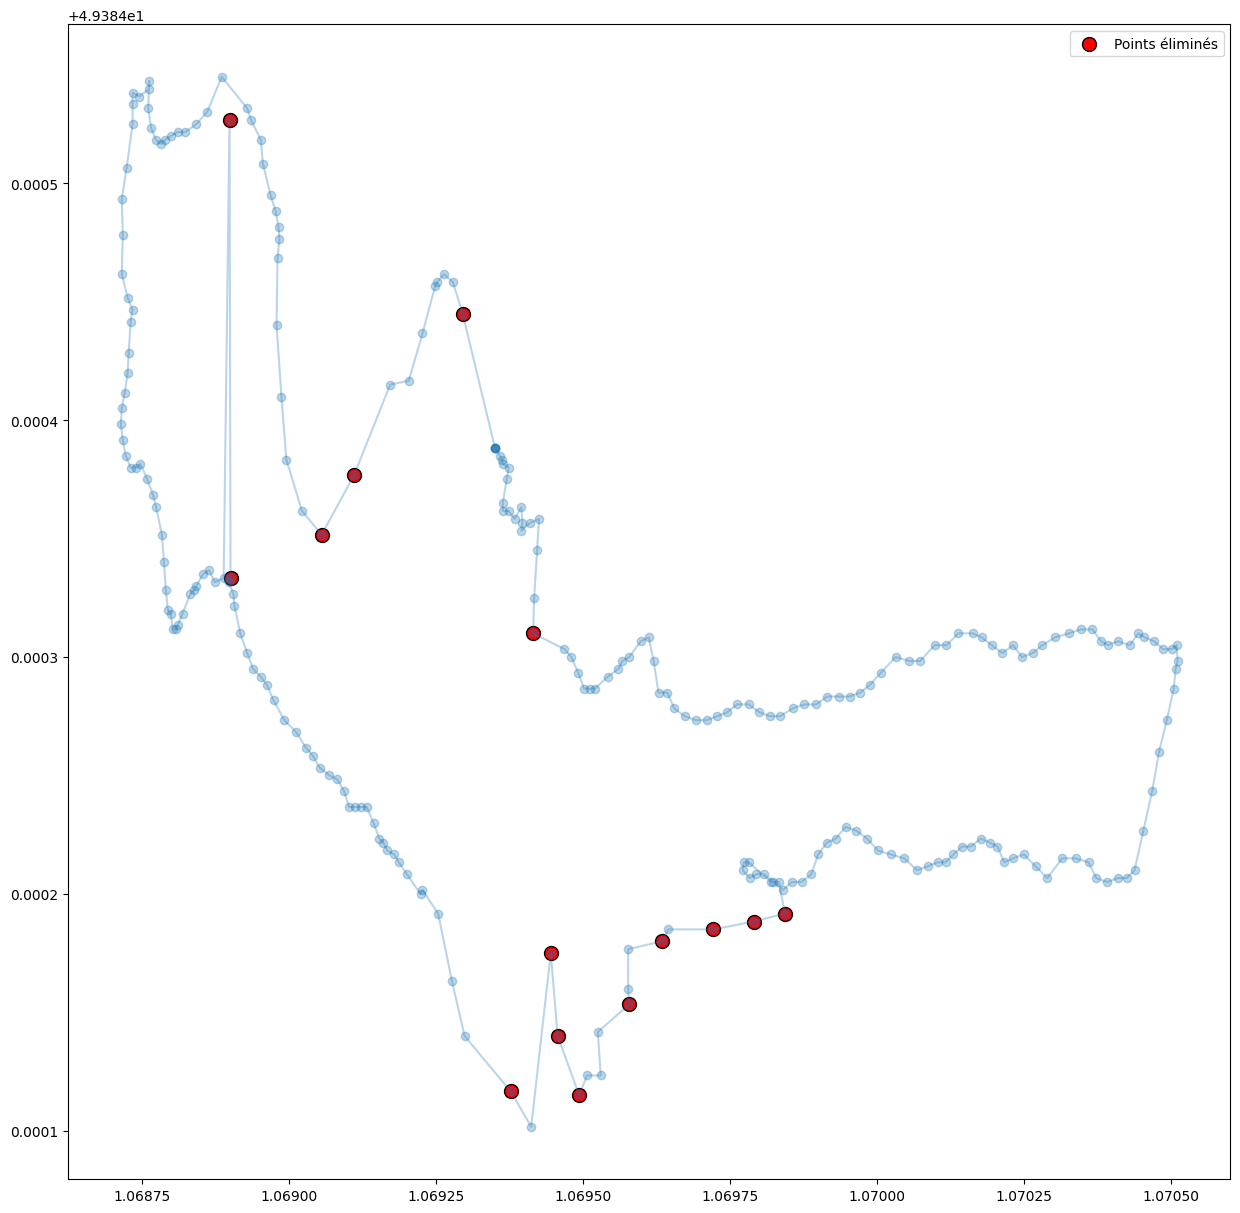

In [25]:
df = data3_mes
df2,_,_ = nettoyage_dataset_2(df)

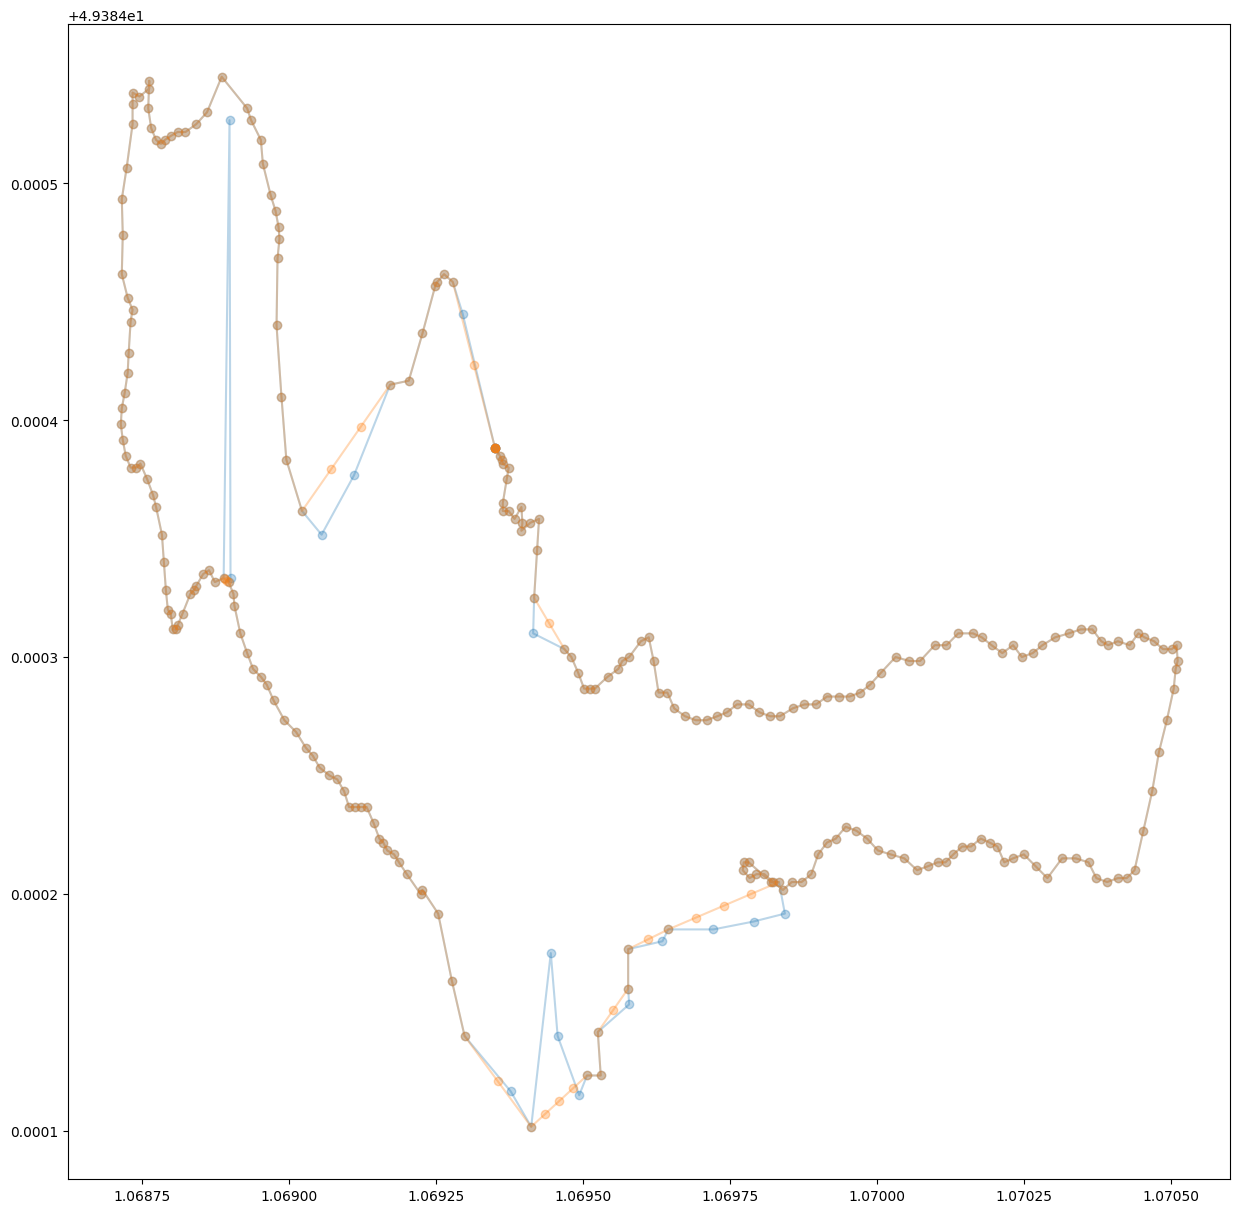

In [26]:
afficher_parcours(df, df2)

In [27]:
#load data
data1_ref = pd.read_csv("../data/GR11_2/boucle1_dumont/boucle1_dumont_gps.csv")
data2_ref = pd.read_csv("../data/GR11_2/boucle2_dumont/boucle2_dumont_gps.csv")
data3_ref = pd.read_csv("../data/GR11_2/boucle3_dumont/boucle3_dumont_gps.csv")
data4_ref = pd.read_csv("../data/GR11_2/boucle4_dumont/boucle4_dumont_gps.csv")
data1_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_1.csv")
data2_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_2.csv")
data3_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_3.csv")
data4_mes = pd.read_csv("../data/GR11_2/data_en_csv/data_dumont_4.csv")

In [28]:
def traitement_total(df):
    df2, d, v = nettoyage_dataset_2(df)
    enlever_erreur_statique(df2)
    afficher_parcours(df, df2)
    nb_pas = calculer_pas_distance_vitesse(np.sum(d),np.mean(v)*3.6)
    print("distance =", np.sum(d), " mètres.")
    print("vitesse moyenne =", np.mean(v)*3.6, " km / h.")
    print("nombre de pas", nb_pas)
    return np.sum(d), np.mean(v)*3.6

Kolmogorov-Smirnov test: p = 1.1530828144412556e-05


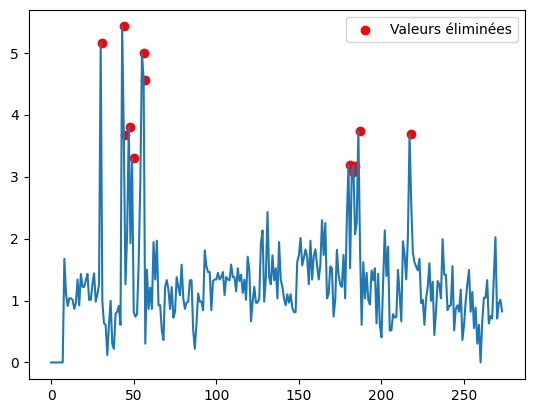

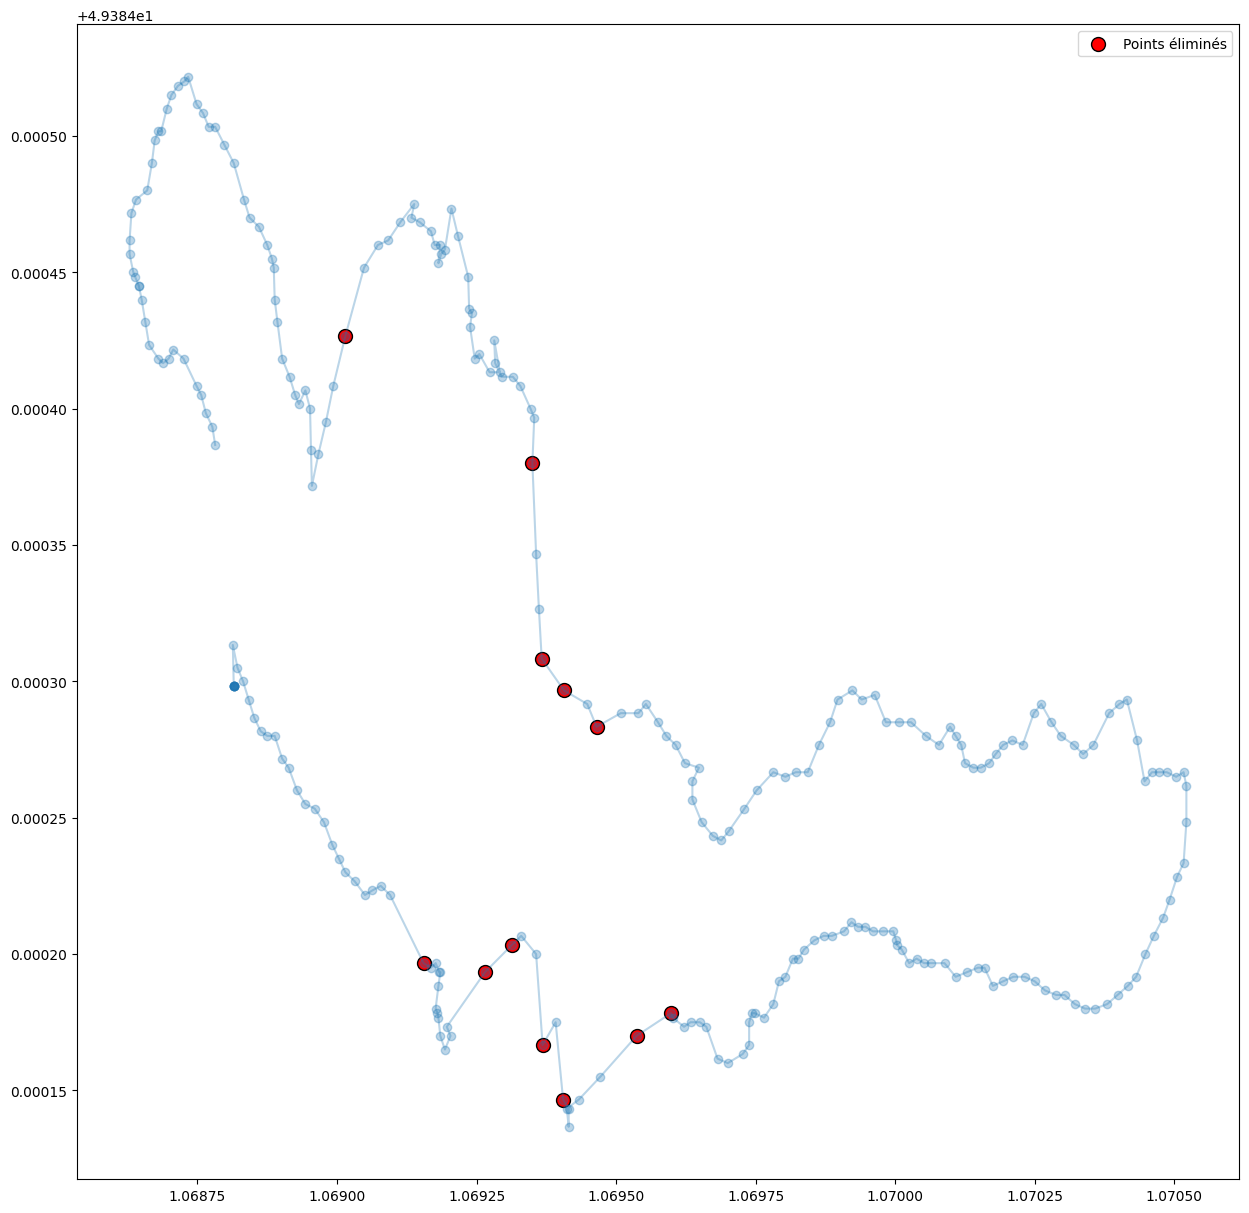

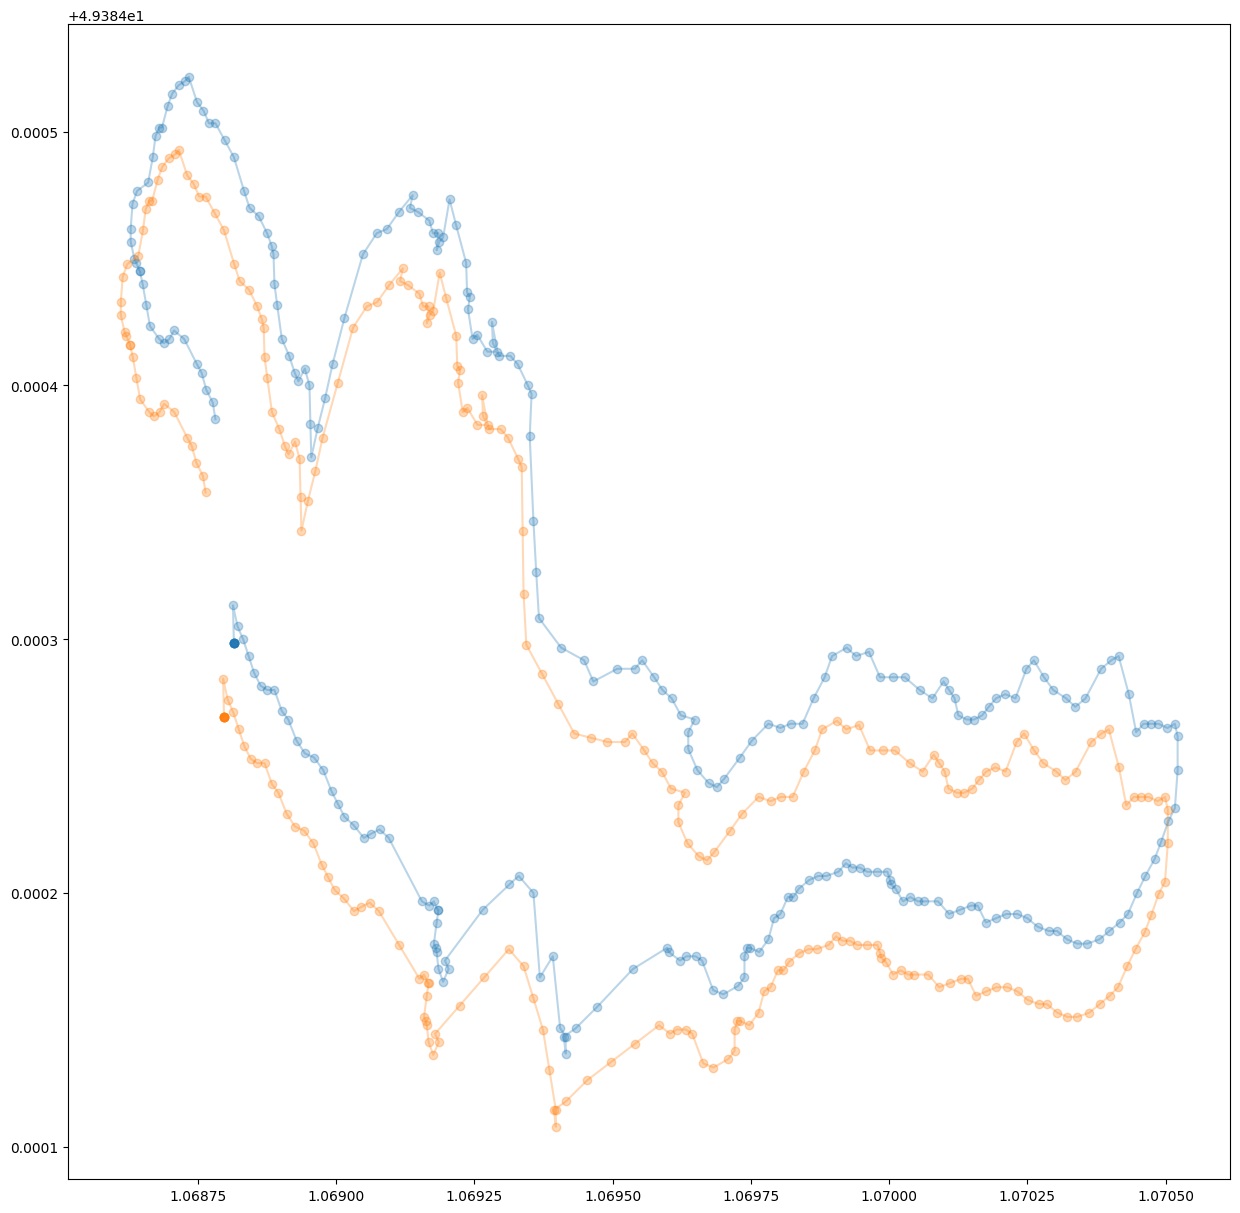

NameError: name 'VITESSE_MARCHE_MOYENNE_HOMME' is not defined

In [29]:
df_test = data4_mes
d, v = traitement_total(df_test)

In [ ]:
VITESSE_MARCHE_MOYENNE_HOMME = 4.5

In [30]:
from scipy.signal import butter, filtfilt, find_peaks


def calculer_pas_distance_vitesse(d, v):
    pas_distance = d / 0.65 
    coef_vitesse = (VITESSE_MARCHE_MOYENNE_HOMME / v)
    return pas_distance * coef_vitesse


def calculer_nb_pas_IMU_stat(df, fs=12.5):  #fs:fréquence d'échantillonnage en Hz
    #1.Calcul norme
    norme = calculer_norme_vecteur_acc(df)

    #2.Filtrage passe-bas (Butterworth)
    norme_filtrée = filtrer_signal(norme, fs, fc=3)

    #3.Paramètres statistiques
    moyenne = np.mean(norme_filtrée)
    std = np.std(norme_filtrée)
    seuil = moyenne + 1.0 * std  #k = 1.0

    #4.Détection des pics
    distance_min = int(0.3 * fs)  #300 ms minimal entre deux pics
    pics, _ = find_peaks(norme_filtrée, height=seuil, distance=distance_min)

    return len(pics)

def calculer_norme_vecteur_acc(df):
    x = df["Accel X"].values
    y = df["Accel Y"].values
    z = df["Accel Z"].values
    return np.sqrt(x**2 + y**2 + z**2)

def filtrer_signal(signal, fs, fc=3):
    # Filtre passe-bas de Butterworth, ordre 4
    b, a = butter(N=4, Wn=fc/(fs/2), btype='low')
    return filtfilt(b, a, signal)

def calculer_pas_total(df, d, v, coef = 0.5):
    pas_imu = calculer_nb_pas_IMU_stat(df)
    print("pas imu ", pas_imu)
    pas_dv = calculer_pas_distance_vitesse(d,v)
    return (((1 - coef)*pas_imu) + coef * pas_dv)

In [31]:
data_imu = pd.read_csv("../data/GR11_2/boucle4_dumont/boucle4_dumont_imu.csv")
pas = calculer_pas_total(data_imu, d, 15)
print(pas)

NameError: name 'd' is not defined

In [100]:
ind = [0,1,2,45,60,75,90,105]
from datetime import datetime, timezone
for i in ind:
    print(datetime.fromtimestamp(data_imu["Timestamp"][i], tz=timezone.utc))

2025-03-25 16:32:15.481780+00:00
2025-03-25 16:32:15.520343+00:00
2025-03-25 16:32:15.558840+00:00
2025-03-25 16:32:17.215603+00:00
2025-03-25 16:32:17.793511+00:00
2025-03-25 16:32:18.371431+00:00
2025-03-25 16:32:18.952633+00:00
2025-03-25 16:32:19.532463+00:00


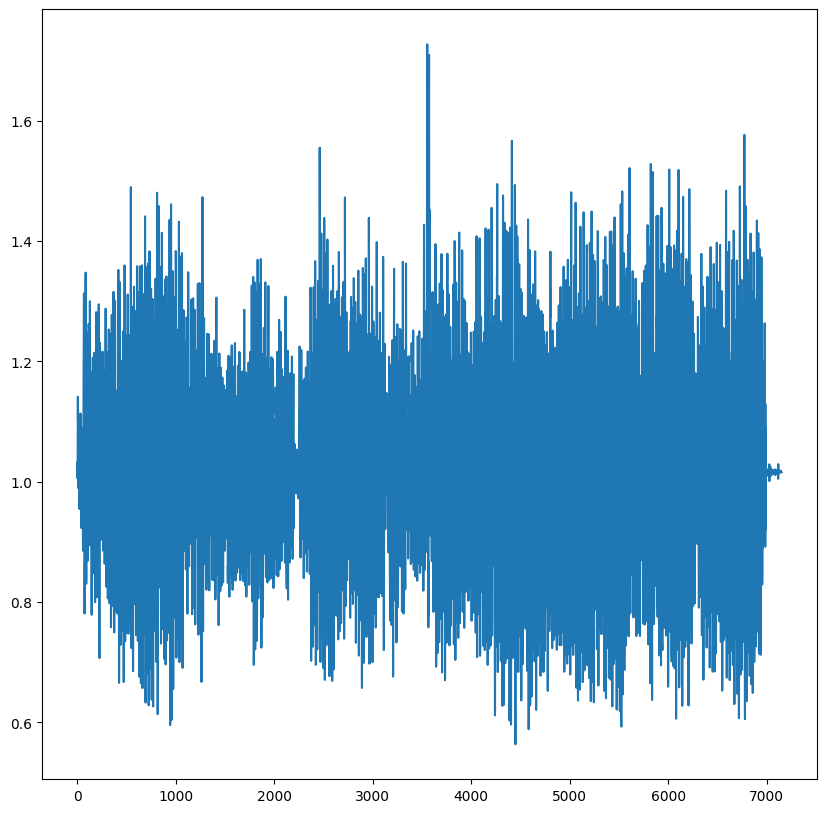

In [75]:
plt.figure(figsize=(10,10))
plt.plot(norms)


In [102]:
1/0.038

26.315789473684212